In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
crops = ['Corn', 'Soybean', "Wheat", "Rice"]


In [25]:
# Read in the region_yield_reduction
factor_yield_reduction = pd.read_excel(".." + os.sep + "reports" + os.sep + "Model_results.xlsx", sheet_name = "YieldReductionperFactor")
factor_yield_reduction.columns = ["Factor","Corn", "Rice", "Soybean", "Wheat"]
# Change to long format
factor_yield_reduction = pd.melt(factor_yield_reduction, id_vars = "Factor", var_name = "Crop", value_name = "Maximal Effect on Yields (%)")
# Multiply by 100
factor_yield_reduction["Maximal Effect on Yields (%)"] = factor_yield_reduction["Maximal Effect on Yields (%)"] * 100
# Rename the factors "Nitrogen", "Pesticides", "Irrigation", "Mechanization"
factor_yield_reduction["Factor"] = factor_yield_reduction["Factor"].replace({"n_total": "Nitrogen", "pesticides": "Pesticides", "irrigation": "Irrigation", "mechanized": "Mechanization"})

factor_yield_reduction

,Factor,Crop,Maximal Effect on Yields (%)
0,Nitrogen,Corn,-17.80
1,Pesticides,Corn,-16.36
2,Irrigation,Corn,-40.05
3,Mechanization,Corn,-35.33
4,Nitrogen,Rice,-45.70
5,Pesticides,Rice,11.14
6,Irrigation,Rice,-38.16
7,Mechanization,Rice,-14.86
8,Nitrogen,Soybean,0.95
9,Pesticides,Soybean,-3.01


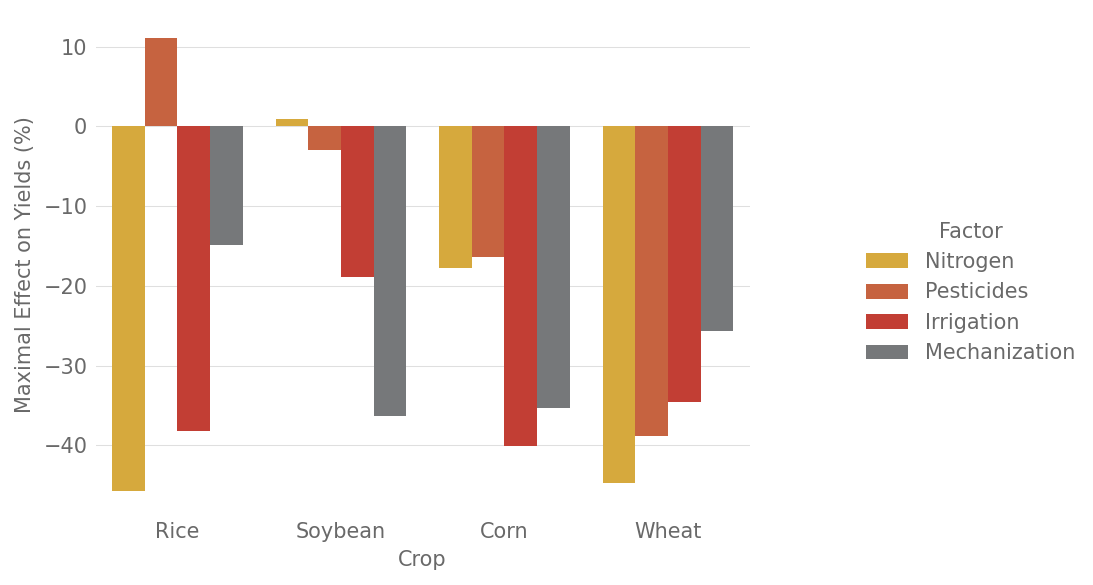

In [34]:
plt.style.use("https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle")
# Set up the figure and subplots
g = sns.catplot(
        data=factor_yield_reduction,
        x='Crop',
        y='Maximal Effect on Yields (%)',
        hue='Factor',
        kind='bar',
        height=4,
        palette= ['#F0B323' ,'#DC582A', "#DA291C", "#75787B"],
        order=["Rice", "Soybean", "Corn", "Wheat"],
    )

for ax in g.axes.flat:
    # Hide borders
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

fig = plt.gcf()
fig.set_size_inches(8, 4)

# Show the plot
plt.savefig("../" + os.sep + "reports" + os.sep + "figures" + os.sep + "yield_reduction_by_factor.png", dpi=300, bbox_inches='tight')